In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

# Photon pressure anhamonicity

Let's try to use QuTiP to calculate the anharmonicity you get in photon-pressure cQED. 

## First, single HO

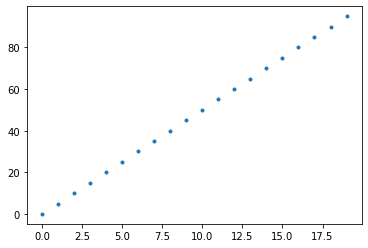

In [15]:
N = 20
a = destroy(N)

w1 = 5 

H = w1*a.dag()*a 
plt.plot(H.eigenenergies(), '.')

## Next, transmon

0.29999999999999893


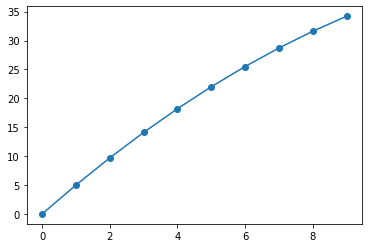

In [71]:
N = 10
a = destroy(N)

w1 = 5
A1 = -0.3/2

#H = w1*a.dag()*a + A1*(a+a.dag())**4
H = w1*a.dag()*a + A1*a.dag()*a.dag()*a*a

E = H.eigenenergies()

anharom = (E[1]-E[0])-(E[2]-E[1])
print(anharom)

plt.plot(E, 'o-')
plt.show()

## Two uncoupled harmonic oscillators

In [200]:
N = 10
a = tensor(destroy(N),qeye(N))
b = tensor(qeye(N),destroy(N))

w1 = 5
w2 = 8
g = 0.1
g_rp = 0.01
K = -0.3/2
#K = 0

H1 = w1*a.dag()*a + w2*b.dag()*b + K*a.dag()*a.dag()*a*a
E1 = H1.eigenenergies()

H2 = w1*a.dag()*a + w2*b.dag()*b + K*a.dag()*a.dag()*a*a + g*(a.dag()*b + b.dag()*a) 
E2 = H2.eigenenergies()

H3 = w1*a.dag()*a + w2*b.dag()*b + K*a.dag()*a.dag()*a*a + g_rp*a.dag()*a*(b+b.dag())
E3 = H3.eigenenergies()

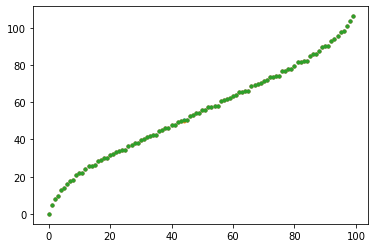

In [201]:
plt.plot(E1, '.')
plt.plot(E2, '.')
plt.plot(E3, '.')

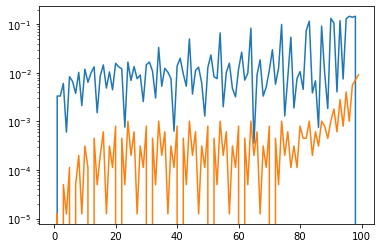

In [202]:
plt.plot(np.abs(E2-E1))
plt.plot(np.abs(E3-E1))
plt.yscale('log')

(-0.001, 0.001)

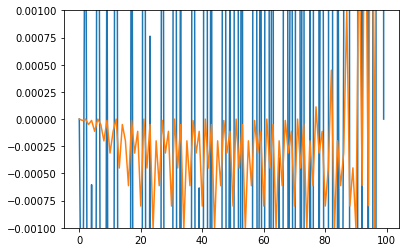

In [205]:
plt.plot(E2-E1)
plt.plot(E3-E1)
plt.ylim(-1e-3,1e-3)

In [164]:
n=50
print(expect(a.dag()*a,modes[n]))
print(expect(b.dag()*b,modes[n]))

4.998892578928305
4.001107421071697


In [144]:
n=4
mode = 0
if mode == 0:
    psi = tensor(basis(N,0), basis(N,n))
else:
    psi = tensor(basis(N,0), basis(N,n))
print(expect(a.dag()*a,psi))
print(expect(H,psi))

0.0
32.0
